In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
# import missingno as msno
from sklearn.utils import shuffle 
# from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

### **Load Data**

In [2]:
columns_to_drop = ['id', 'price', 'data_source']

train_data = pd.read_csv('train_data.csv').drop(columns=['brand_name', 'model_name', 'type_name', 'color_name', 'transmission_name', 'condition_name', 'province_name', 'region_name'], axis=1)
test_data = pd.read_csv('test_data.csv').drop(columns=['brand_name', 'model_name', 'type_name', 'color_name', 'transmission_name', 'condition_name', 'province_name', 'region_name'], axis=1)

x_train = train_data.drop(columns=columns_to_drop, axis=1)
y_train = train_data['price']

x_test = test_data.drop(columns=columns_to_drop, axis=1)
y_test = test_data['price']

# Check the shapes to ensure they match
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)



x_train shape: (575736, 11)
y_train shape: (575736,)
x_test shape: (143932, 11)
y_test shape: (143932,)


In [3]:
train_data.head()

,id,brand,model,type,color,year,mileage,transmission,condition,price,province,region,data_source,age
0,a01969a8-6cd8-4cb4-a572-e51467d32fe4,0,73,186,9,2017,20000,0,1,475000000.0,7,271,OLX,7
1,08b61c87-6b06-48d2-b90b-ca128484684c,0,73,186,6,2017,65000,0,1,320000000.0,7,271,OLX,7
2,9c501c4d-26fa-406e-a2e5-0b30d006c31f,0,73,198,9,2017,10000,0,1,450000000.0,7,271,OLX,7
3,17603f16-fbff-41d4-b61b-285633dcd2de,0,73,198,9,2023,20000,0,1,510000000.0,7,271,OLX,1
4,27baaa5f-325b-4b00-961d-ea8fd83e70cb,0,73,198,11,2017,35000,0,1,334375000.0,7,271,OLX,7


In [4]:
test_data.head()

,id,brand,model,type,color,year,mileage,transmission,condition,price,province,region,data_source,age
0,20e02bbd-6cc5-4a17-b074-8f504a3795bd,0,73,186,5,2004,110000,1,1,110000000.0,3,271,OLX,20
1,bd8af6e9-e475-4081-bd96-ac45e69aecc5,0,73,198,6,2018,25000,0,1,375000000.0,7,271,OLX,6
2,9e4b876f-8f3d-403b-a22e-be6cc3fa3412,0,73,303,9,2016,15000,0,1,450000000.0,7,271,OLX,8
3,add3c3ac-c405-4ce3-a1ef-7162ea8d27fe,0,73,303,9,2016,15000,0,1,395000000.0,7,271,OLX,8
4,a54e3fe3-e172-453b-a5c5-dc8ab0562026,0,73,945,0,2004,90000,0,1,145000000.0,7,271,OLX,20


Text(0, 0.5, 'frequency')

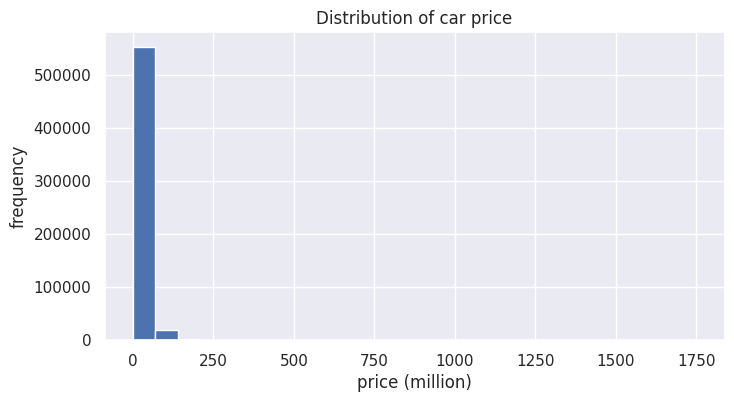

In [5]:
import matplotlib.pyplot as plt

train_data['price'].div(10000000).plot.hist(bins=25, figsize=(8,4))
plt.title('Distribution of car price')
plt.xlabel('price (million)')
plt.ylabel('frequency')

## **1. Linear Regression**

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# predictions
# y_train_pred = model.predict(x_train)
y_predict = model.predict(x_test)

In [7]:
from sklearn import metrics

print("MAE data train:", metrics.mean_absolute_error(y_test,y_predict))
print("RMSE data train:", np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print("R-squared train:", round(metrics.r2_score(y_test,y_predict),3))

MAE data train: 128348449.71465443
RMSE data train: 336374017.27608526
R-squared train: 0.164


### **Regplot for Linear Regression Output**

We would be using the seaborn's regplot to better understand how the data is spread. We see how the values are spread out and get a good understanding. We can understand from the plot that the predictions were very close to the actual values that we have considered. 

In [8]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [9]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

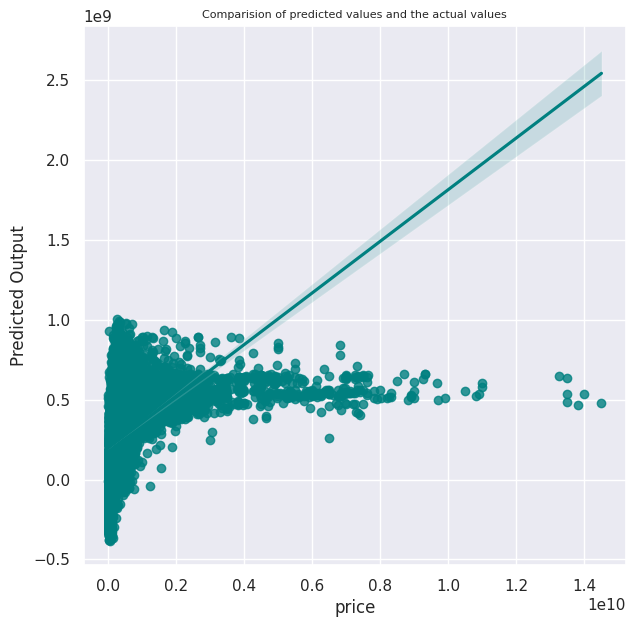

In [10]:
plt.figure(figsize = (7, 7))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 8)
plt.show()

## **2. K - Neighbors Regressor**

In [18]:
model = KNeighborsRegressor(n_neighbors=2)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)  # Changed y_test to x_test
y_predict = pd.DataFrame(y_predict, columns=['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis=1, ignore_index=False)

In [19]:
import joblib

# Save the trained model using joblib
filename = 'carprice_model.joblib'
joblib.dump(model, filename)

['carprice_model.joblib']

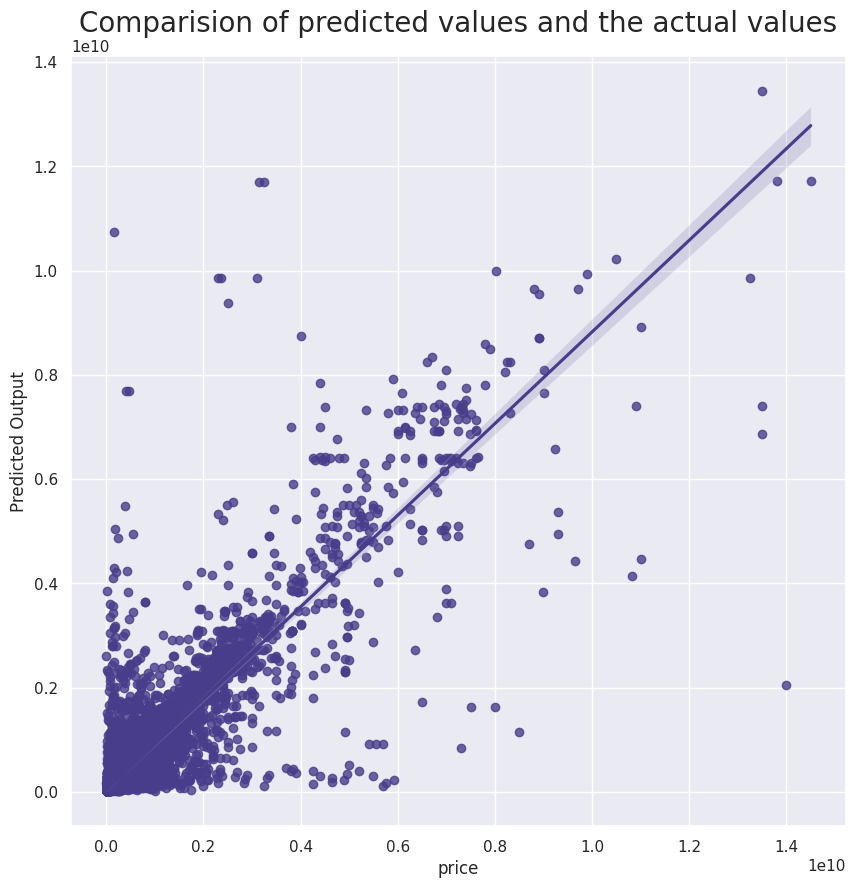

In [13]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', color = 'darkslateblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

## **3. PLS Regression**

In [14]:
model = PLSRegression(n_components = 11)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

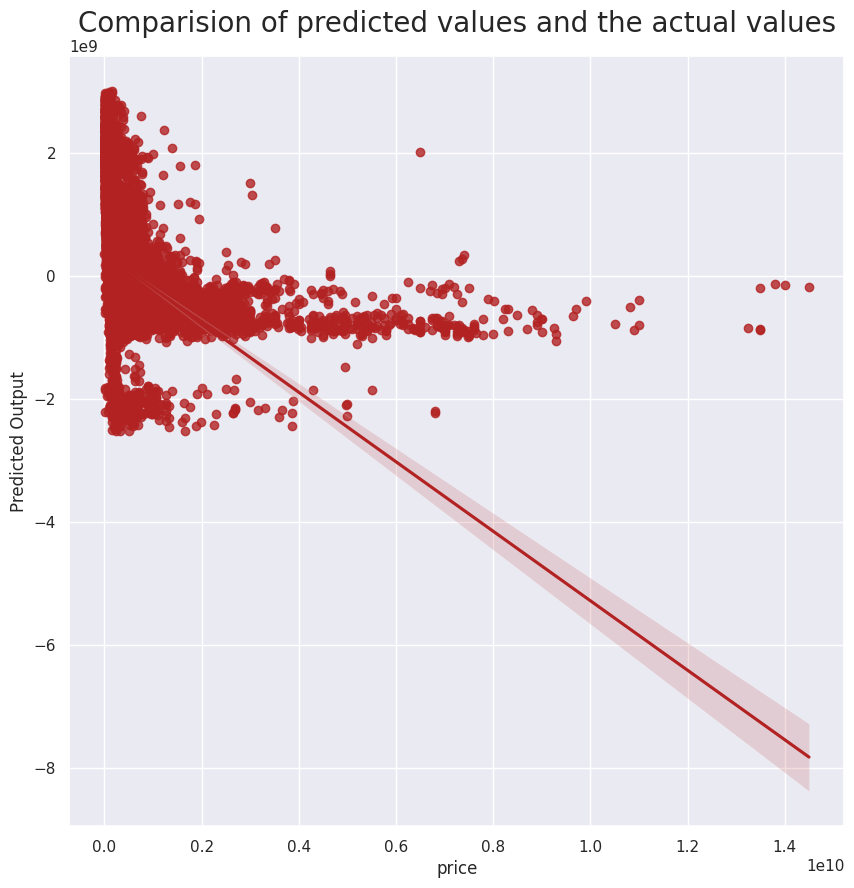

In [15]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'price', color = 'firebrick', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

## **4. Deep Learning Model**

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))  # Input layer + first hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions
y_predict = model.predict(x_test)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

2024-08-18 08:21:38.005513: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-18 08:21:38.025709: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 08:21:38.025732: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 08:21:38.026351: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-18 08:21:38.029797: I tensorflow/core/platform/cpu_feature_guar

Epoch 1/100


2024-08-18 08:21:39.438080: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-08-18 08:21:39.657271: I external/local_xla/xla/service/service.cc:168] XLA service 0x73836130da50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-08-18 08:21:39.657293: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-08-18 08:21:39.660909: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-08-18 08:21:39.670534: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
I0000 00:00:1723944099.714263   59373 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


14394/14394 [==============================] - 17s 1ms/step - loss: 138783432854470656.0000 - val_loss: 52994635097702400.0000
Epoch 2/100
14394/14394 [==============================] - 16s 1ms/step - loss: 112005230886912000.0000 - val_loss: 56673257406857216.0000
Epoch 3/100
14394/14394 [==============================] - 16s 1ms/step - loss: 110671360073662464.0000 - val_loss: 58768952339202048.0000
Epoch 4/100
14394/14394 [==============================] - 16s 1ms/step - loss: 110148602424197120.0000 - val_loss: 59297959166083072.0000
Epoch 5/100
14394/14394 [==============================] - 16s 1ms/step - loss: 109822365298327552.0000 - val_loss: 60170318563508224.0000
Epoch 6/100
14394/14394 [==============================] - 16s 1ms/step - loss: 109573016676990976.0000 - val_loss: 59749136890593280.0000
Epoch 7/100
14394/14394 [==============================] - 16s 1ms/step - loss: 109386142649942016.0000 - val_loss: 60681015944806400.0000
Epoch 8/100
14394/14394 [==============